#### Import libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Load the dataset & explore it's structure

### 1.Exploratory Data Analysis (EDA)

In [34]:
# Read the csv file
data = pd.read_csv('../data/Students_Grading_Dataset.csv')
data.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [35]:
# Check the shape of the data (count of rows and columns)
data.shape 

(5000, 23)

In [36]:
# Check the columns in the data
data.columns 

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [37]:
#Drop useless columns
data.drop(['Student_ID', 'First_Name', 'Last_Name', 'Email'], axis=1, inplace=True)

In [38]:
# Check general info
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              4484 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             4483 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

In [39]:
# Types of columns
data.dtypes

Gender                         object
Age                             int64
Department                     object
Attendance (%)                float64
Midterm_Score                 float64
Final_Score                   float64
Assignments_Avg               float64
Quizzes_Avg                   float64
Participation_Score           float64
Projects_Score                float64
Total_Score                   float64
Grade                          object
Study_Hours_per_Week          float64
Extracurricular_Activities     object
Internet_Access_at_Home        object
Parent_Education_Level         object
Family_Income_Level            object
Stress_Level (1-10)             int64
Sleep_Hours_per_Night         float64
dtype: object

In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,21.048400,1.989786,18.00,19.0000,21.000,23.0000,24.00
Attendance (%),4484.0,75.431409,14.372446,50.01,63.2650,75.725,87.4725,100.00
Midterm_Score,5000.0,70.326844,17.213209,40.00,55.4575,70.510,84.9700,99.98
Final_Score,5000.0,69.640788,17.238744,40.00,54.6675,69.735,84.5000,99.98
Assignments_Avg,4483.0,74.798673,14.411799,50.00,62.0900,74.810,86.9700,99.98
Quizzes_Avg,5000.0,74.910728,14.504281,50.03,62.4900,74.695,87.6300,99.96
Participation_Score,5000.0,4.980024,2.890136,0.00,2.4400,4.955,7.5000,10.00
Projects_Score,5000.0,74.924860,14.423415,50.01,62.3200,74.980,87.3675,100.00
Total_Score,5000.0,75.121804,14.399941,50.02,62.8350,75.395,87.6525,99.99
Study_Hours_per_Week,5000.0,17.658860,7.275864,5.00,11.4000,17.500,24.1000,30.00


In [41]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include='number').columns
numerical_columns

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
      dtype='object')

In [42]:
# Identify the categorical columns
category_columns = data.select_dtypes(include='object').columns
category_columns

Index(['Gender', 'Department', 'Grade', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level'],
      dtype='object')

In [43]:
#Display number of categories and their counts in categorical columns
for col in category_columns:
    print(f'Column: {col}')
    print(f'It has {data[col].nunique()} categories')
    print(data[col].value_counts())
    print('\n')

Column: Gender
It has 2 categories
Gender
Male      2551
Female    2449
Name: count, dtype: int64


Column: Department
It has 4 categories
Department
CS             2022
Engineering    1469
Business       1006
Mathematics     503
Name: count, dtype: int64


Column: Grade
It has 5 categories
Grade
A    1495
B     978
D     889
F     844
C     794
Name: count, dtype: int64


Column: Extracurricular_Activities
It has 2 categories
Extracurricular_Activities
No     3493
Yes    1507
Name: count, dtype: int64


Column: Internet_Access_at_Home
It has 2 categories
Internet_Access_at_Home
Yes    4485
No      515
Name: count, dtype: int64


Column: Parent_Education_Level
It has 4 categories
Parent_Education_Level
PhD            820
Bachelor's     810
High School    796
Master's       780
Name: count, dtype: int64


Column: Family_Income_Level
It has 3 categories
Family_Income_Level
Low       1983
Medium    1973
High      1044
Name: count, dtype: int64




In [44]:
#Check for nulls in columns
data.isnull().sum()

Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [45]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

#### Data Cleaning

In [46]:
# Handle missing values
# Impute missing numerical values with the mean
for col in ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg']:
    data[col].fillna(data[col].mean(), inplace=True)

/tmp/ipykernel_8257/2890954390.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [47]:
# Impute missing categorical values with the mode
for col in ['Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level']:
    data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipykernel_8257/807777975.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [48]:
#Check for nulls in columns
data.isnull().sum()

Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [49]:
# Convert columns to appropriate data types
data['Age'] = data['Age'].astype(int)
data['Study_Hours_per_Week'] = data['Study_Hours_per_Week'].astype(float)
data['Sleep_Hours_per_Night'] = data['Sleep_Hours_per_Night'].astype(float)

In [51]:
# Encode categorical variables
categorical_cols = ['Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [52]:
# Display cleaned data info
print("\nCleaned data info:")
print(data.info())


Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   int64  
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   int64  
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricul

In [53]:
print("\nCleaned data sample:")
print(data.head())


Cleaned data sample:
   Gender  Age  Department  Attendance (%)  Midterm_Score  Final_Score  \
0       0   22           2           52.29          55.03        57.82   
1       1   18           2           97.27          97.23        45.80   
2       1   24           0           57.19          67.05        93.68   
3       0   24           3           95.15          47.79        80.63   
4       0   23           1           54.18          46.59        78.89   

   Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0        84.220000        74.06                 3.99           85.90   
1        74.798673        94.24                 8.32           55.65   
2        67.700000        85.70                 5.05           73.79   
3        66.060000        93.51                 6.54           92.12   
4        96.850000        83.70                 5.97           68.42   

   Total_Score Grade  Study_Hours_per_Week  Extracurricular_Activities  \
0        56.09     F      

### Descriptive Statistics and Visualizations

In [55]:
# Descriptive statistics
print("\nDescriptive Statistics after cleaning:")
print(data.describe().T)


Descriptive Statistics after cleaning:
                             count       mean        std    min      25%  \
Gender                      5000.0   0.510200   0.499946   0.00   0.0000   
Age                         5000.0  21.048400   1.989786  18.00  19.0000   
Department                  5000.0   1.293800   0.900691   0.00   1.0000   
Attendance (%)              5000.0  75.431409  13.610481  50.01  64.7375   
Midterm_Score               5000.0  70.326844  17.213209  40.00  55.4575   
Final_Score                 5000.0  69.640788  17.238744  40.00  54.6675   
Assignments_Avg             5000.0  74.798673  13.646226  50.00  63.6875   
Quizzes_Avg                 5000.0  74.910728  14.504281  50.03  62.4900   
Participation_Score         5000.0   4.980024   2.890136   0.00   2.4400   
Projects_Score              5000.0  74.924860  14.423415  50.01  62.3200   
Total_Score                 5000.0  75.121804  14.399941  50.02  62.8350   
Study_Hours_per_Week        5000.0  17.658860   

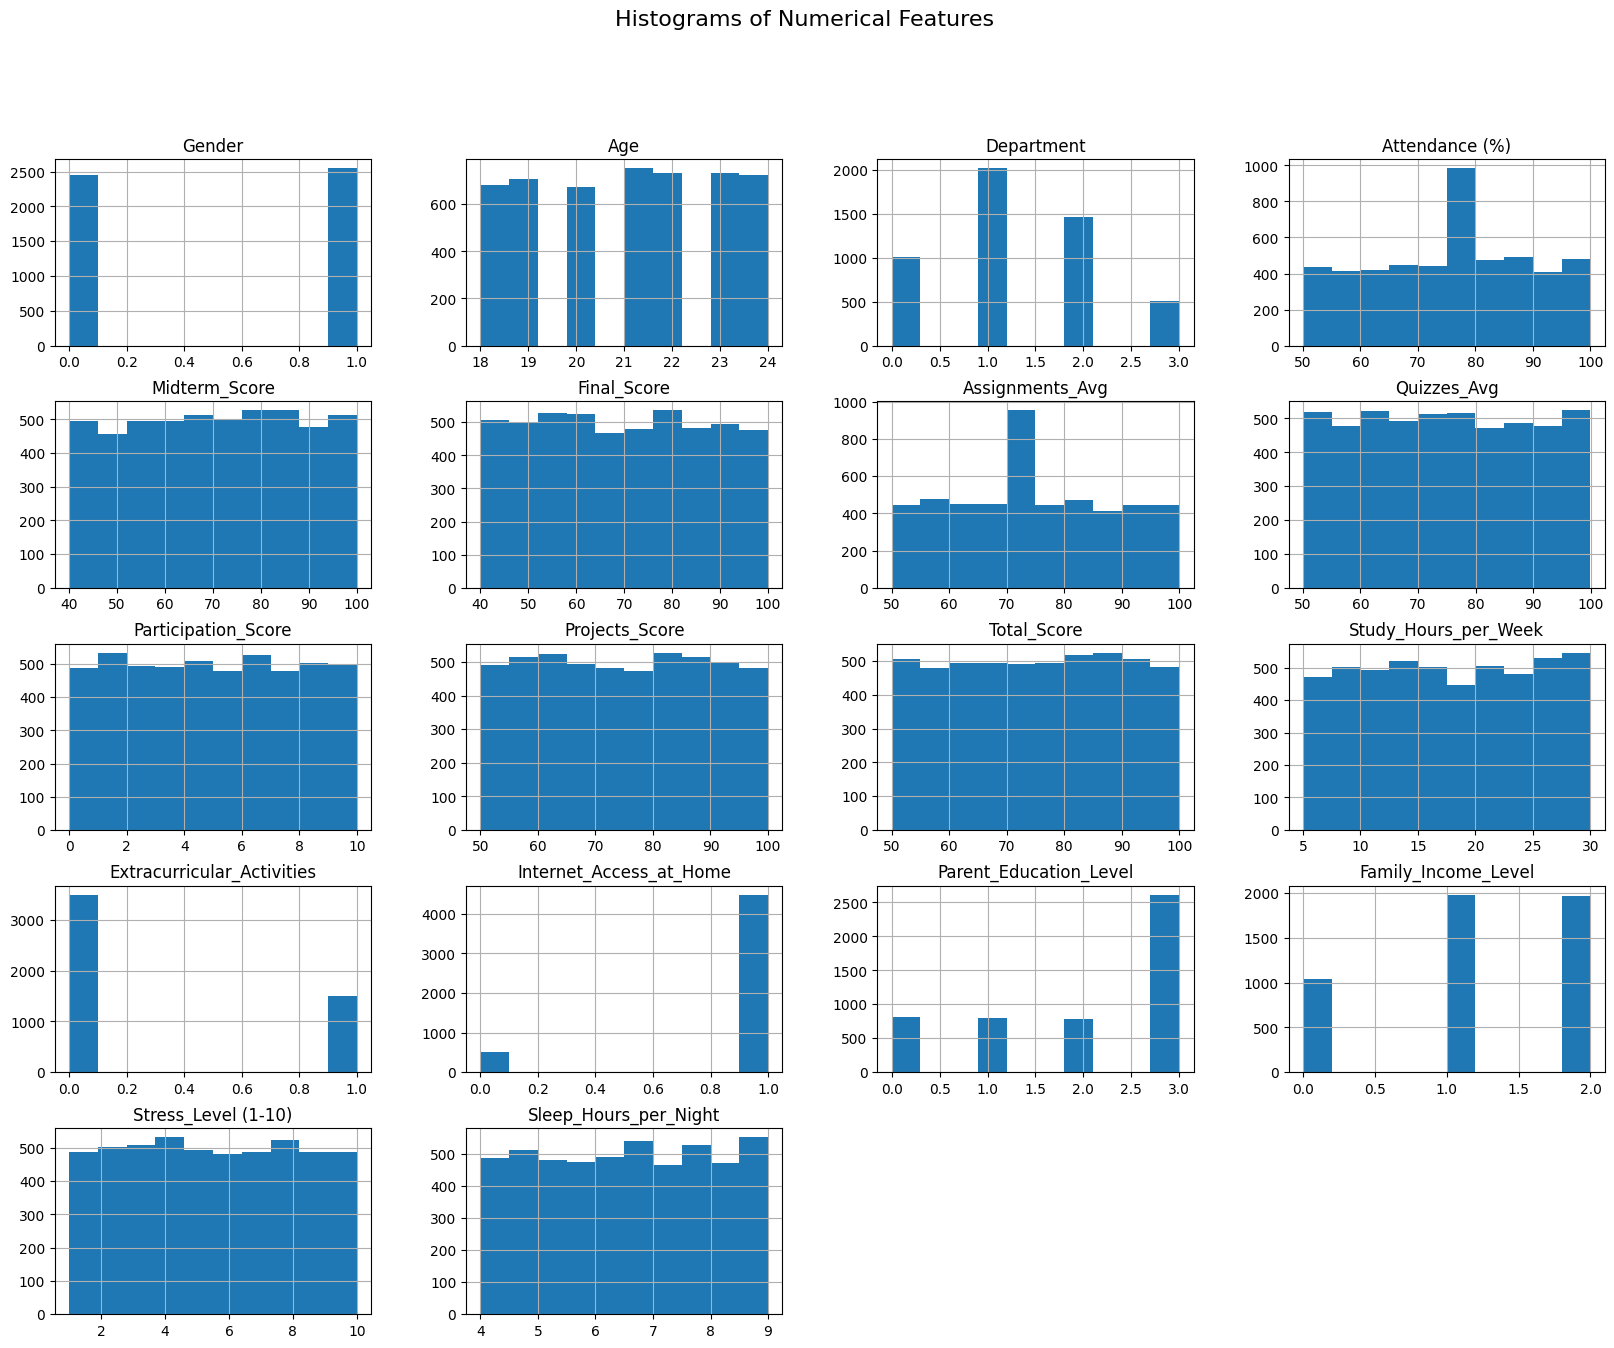

In [ ]:
# Histograms for numerical features
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
data[numerical_cols].hist(figsize=(20,15))
plt.suptitle('Histograms of Numerical Features', x=0.5, y=0.98, fontsize=16)
plt.show()

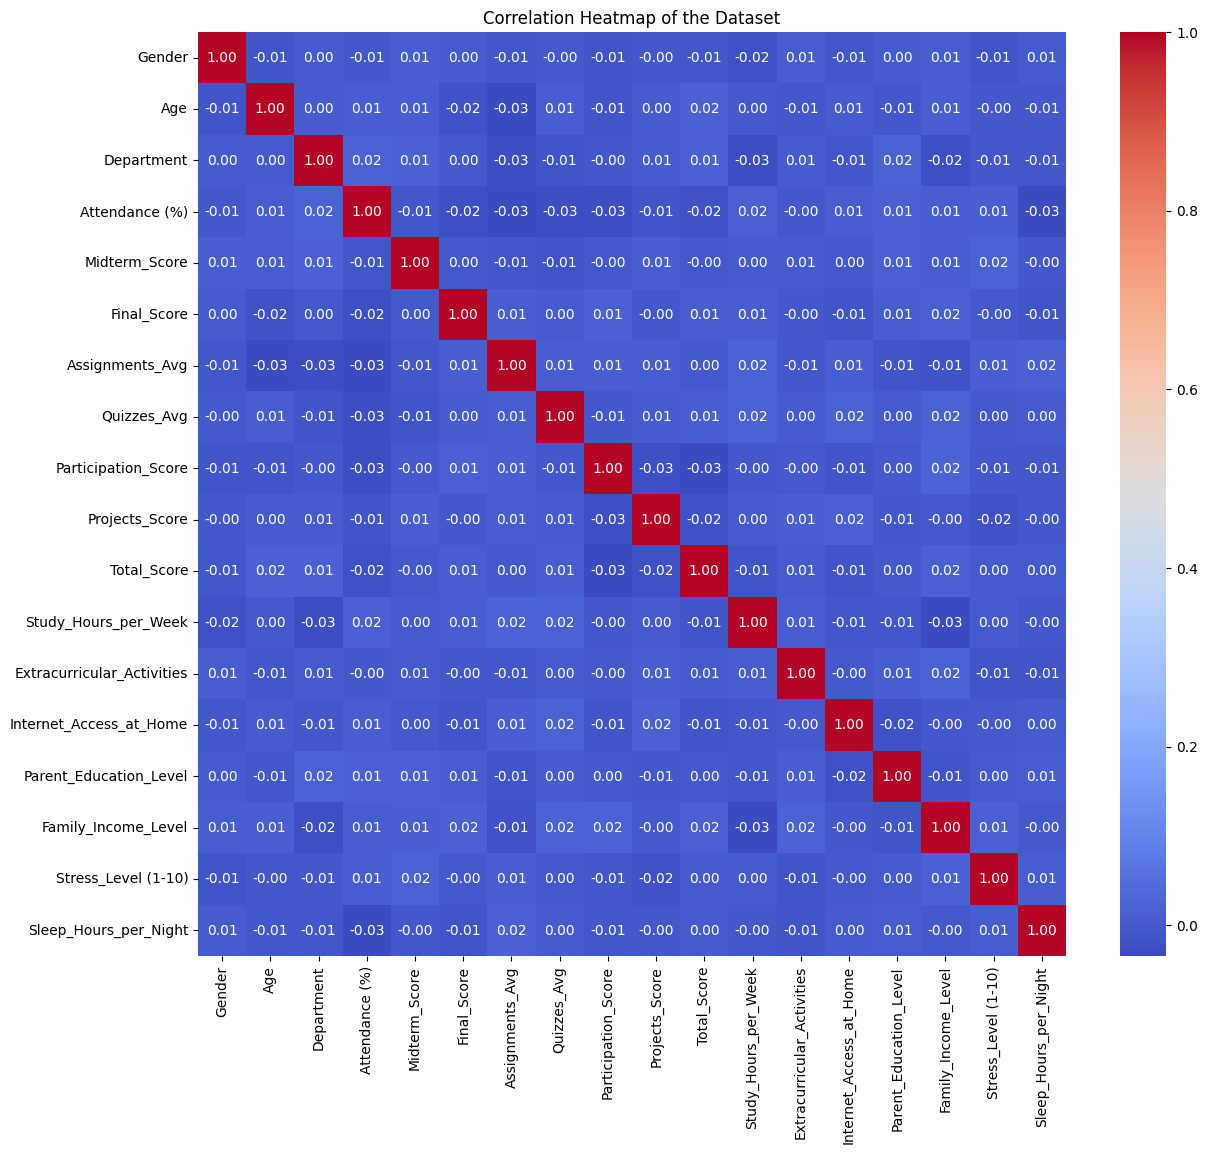

In [67]:
# Correlation heatmap
num_cols= data.select_dtypes(include='number')
plt.figure(figsize=(14, 12))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the Dataset')
plt.show()

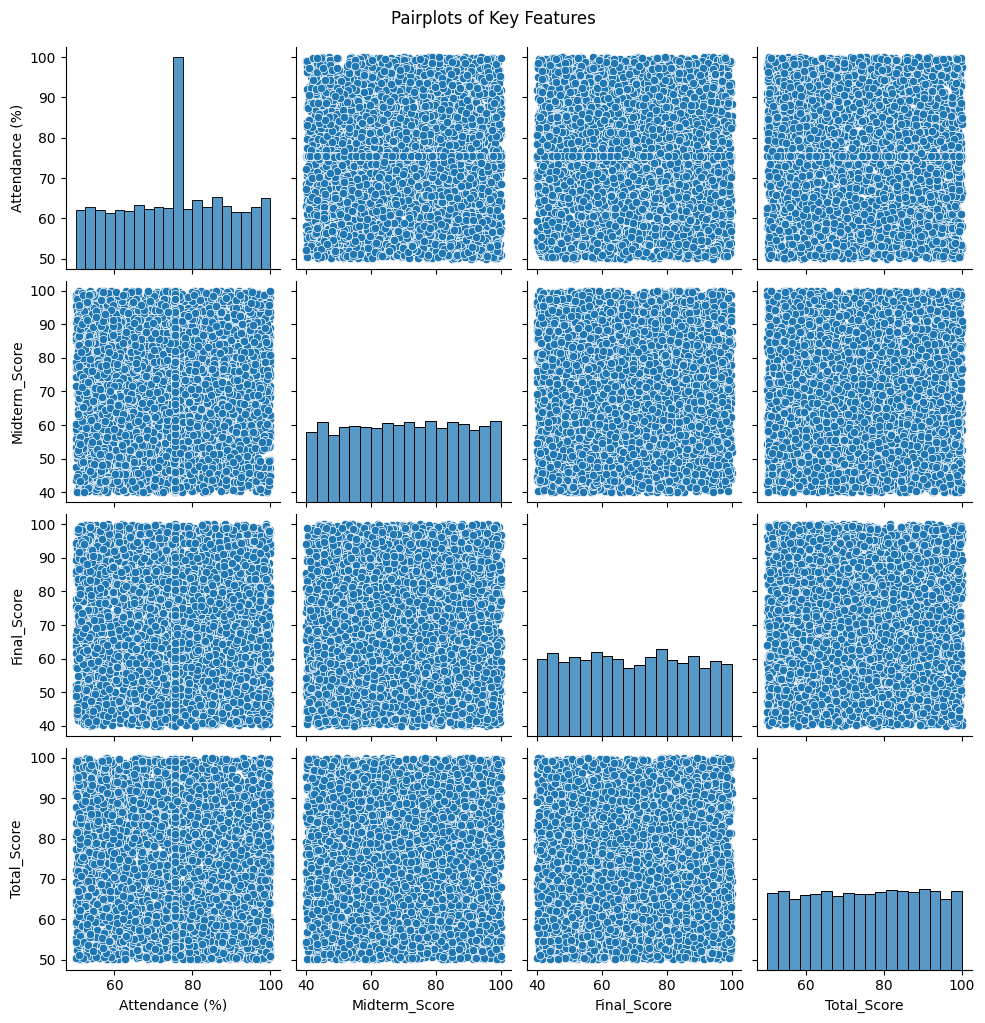

In [58]:
# Scatter plots for key relationships
sns.pairplot(data[['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Total_Score', 'Grade']])
plt.suptitle('Pairplots of Key Features', y=1.02)
plt.show()

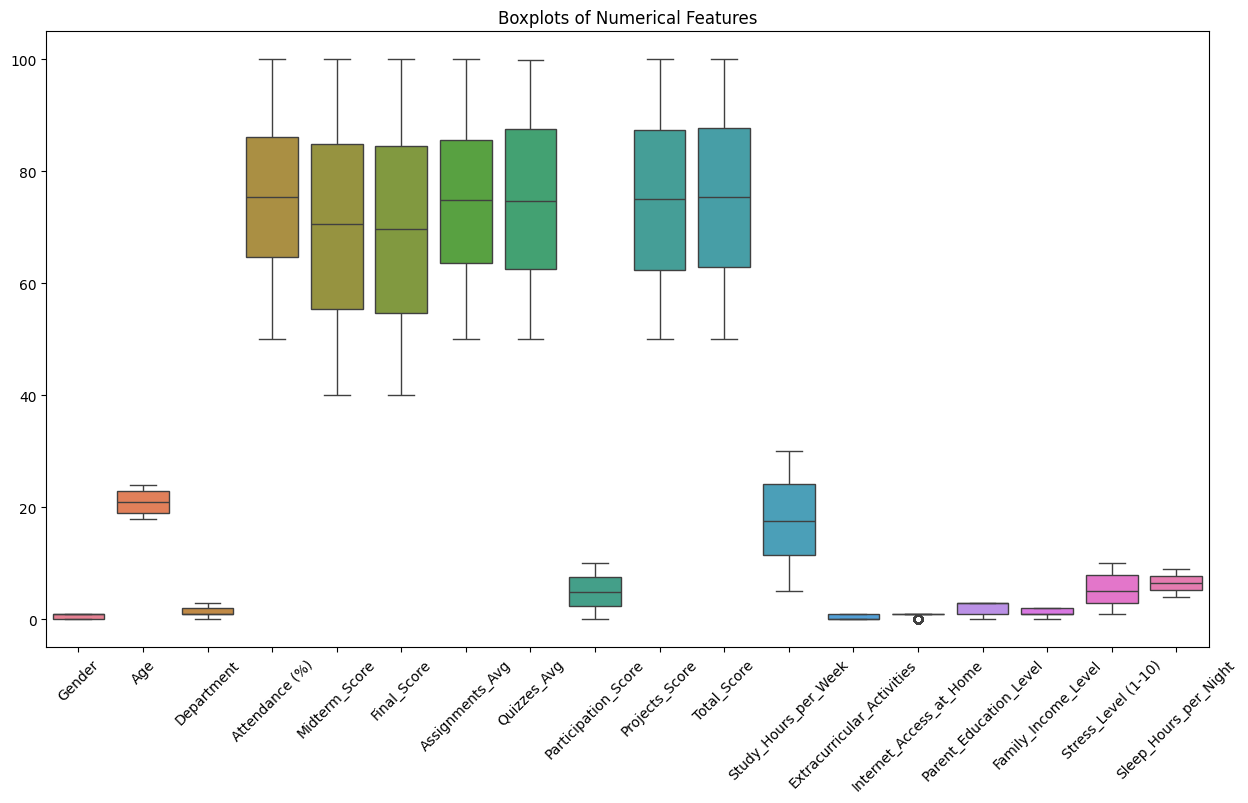

In [59]:
# Box plots for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

### 2. Clustering Analysis

In [68]:
# Selecting features for clustering
cluster_features = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

In [69]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[cluster_features])

In [70]:
# Determine the optimal number of clusters using the Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

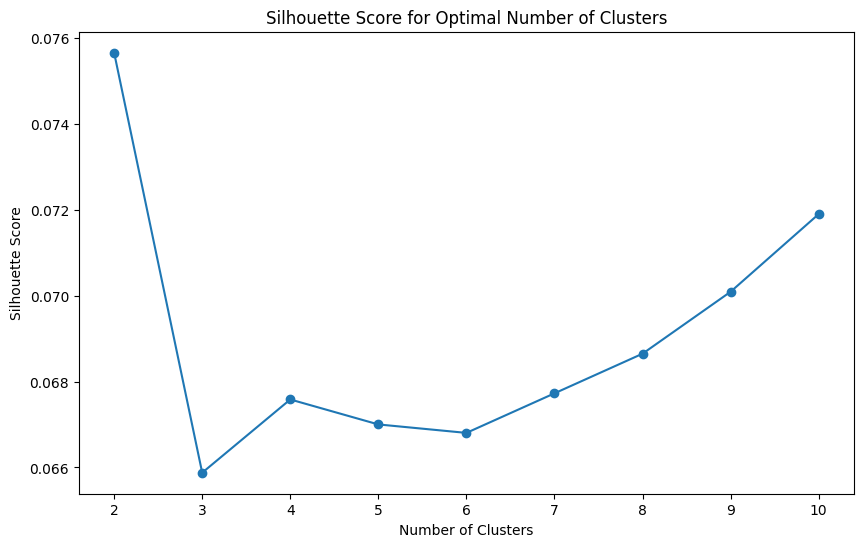

In [71]:
# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [72]:
# Choose the number of clusters based on the highest Silhouette Score
optimal_clusters = range(2, 11)[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')

Optimal number of clusters: 2


In [73]:
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [75]:
# Analyze the clusters
cluster_summary = data.groupby('Cluster')[cluster_features].mean()
print("\nCluster Summary:")
print(cluster_summary.T)


Cluster Summary:
Cluster                        0          1
Attendance (%)         75.628713  75.241692
Midterm_Score          70.066965  70.576732
Final_Score            70.370441  68.939188
Assignments_Avg        75.468030  74.155050
Quizzes_Avg            75.987956  73.874916
Participation_Score     4.950237   5.008666
Projects_Score         74.795630  75.049121
Study_Hours_per_Week   24.087964  11.476932
Stress_Level (1-10)     5.555692   5.408788
Sleep_Hours_per_Night   6.487026   6.489211


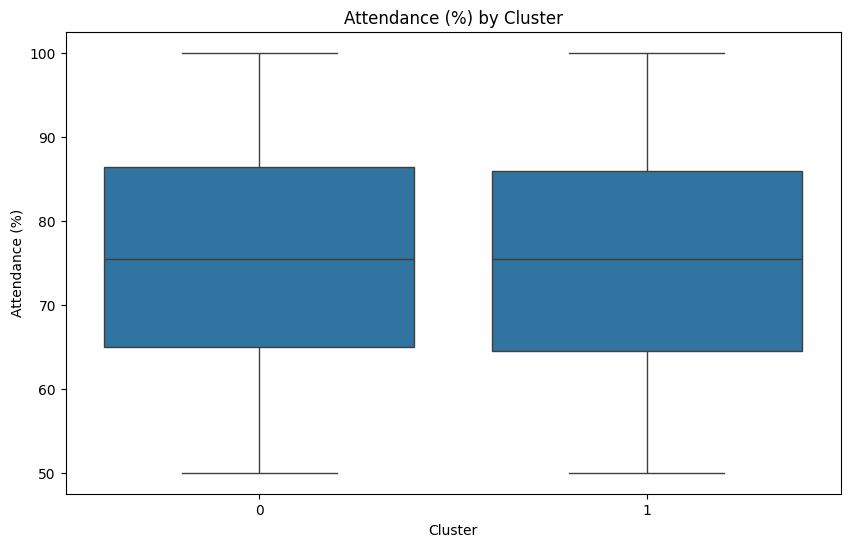

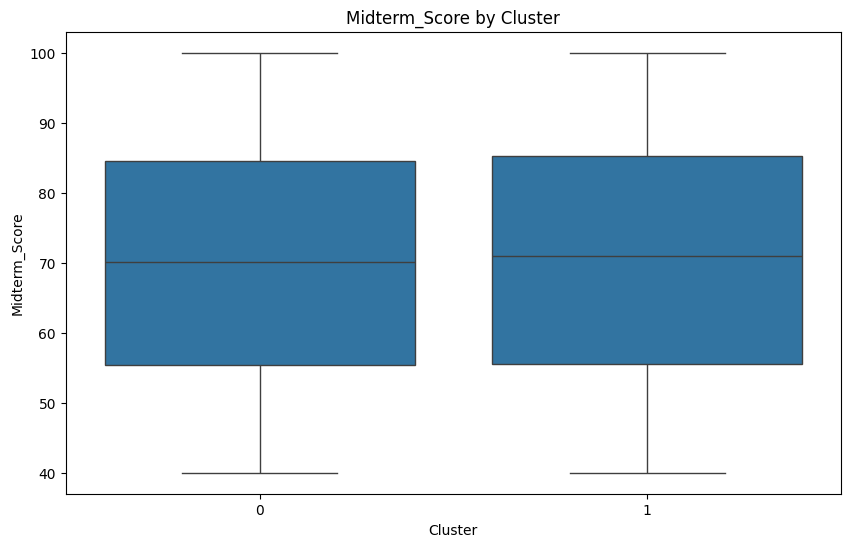

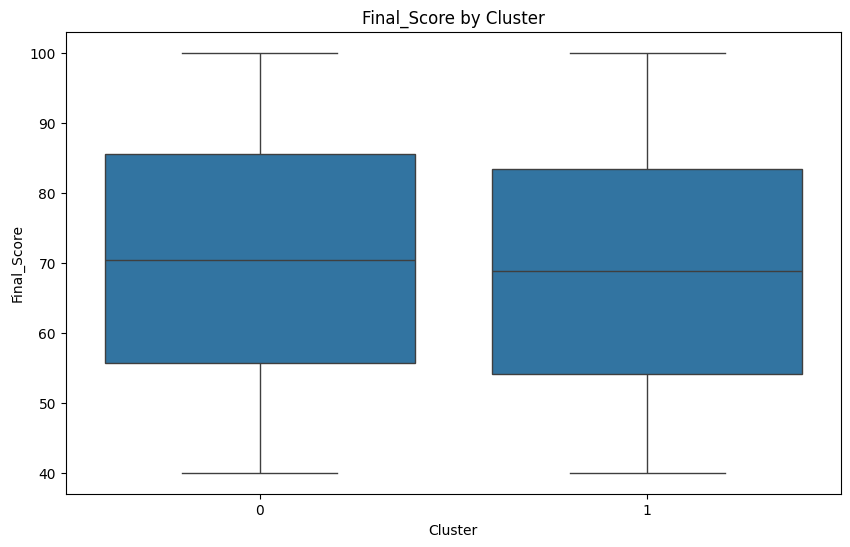

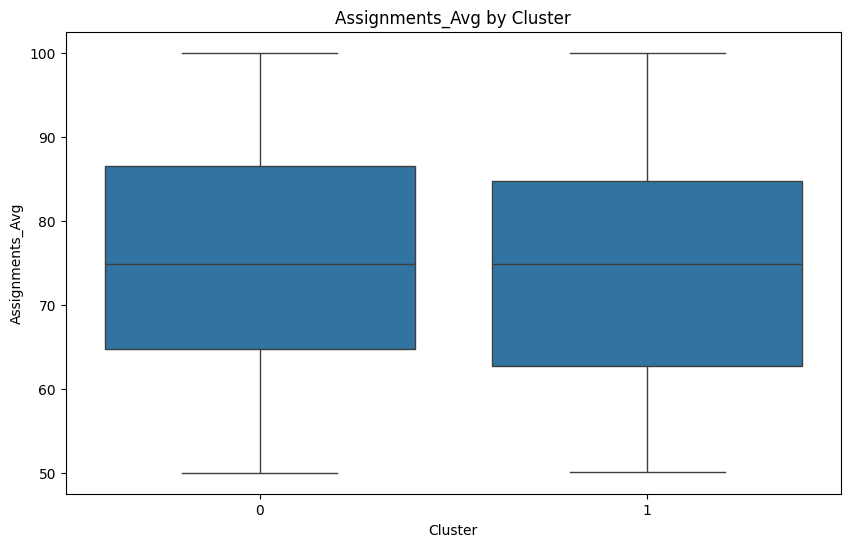

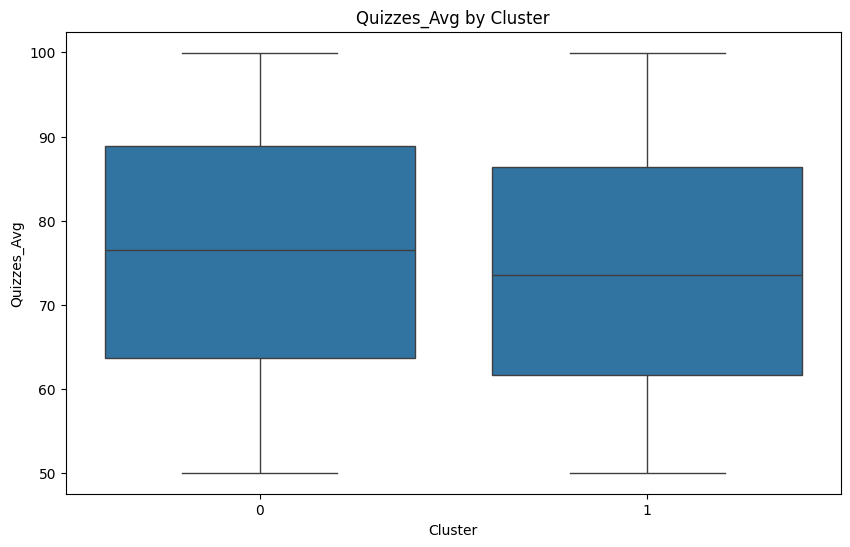

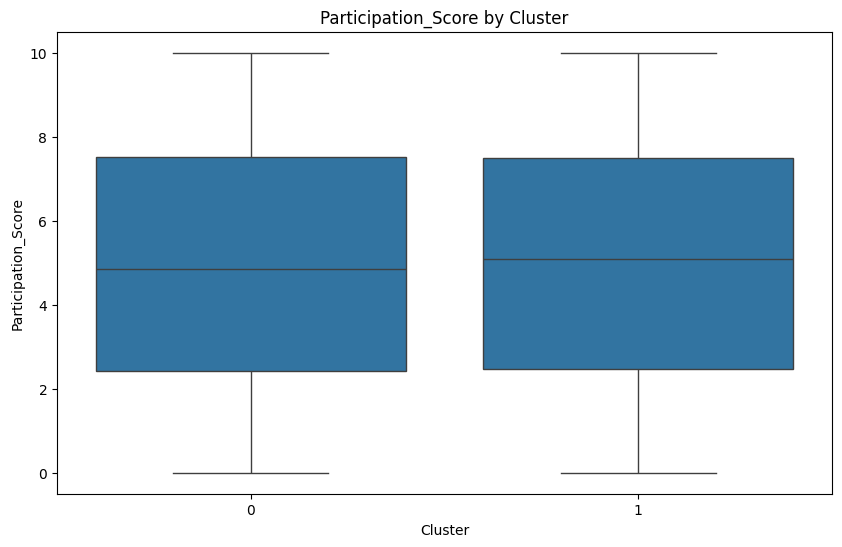

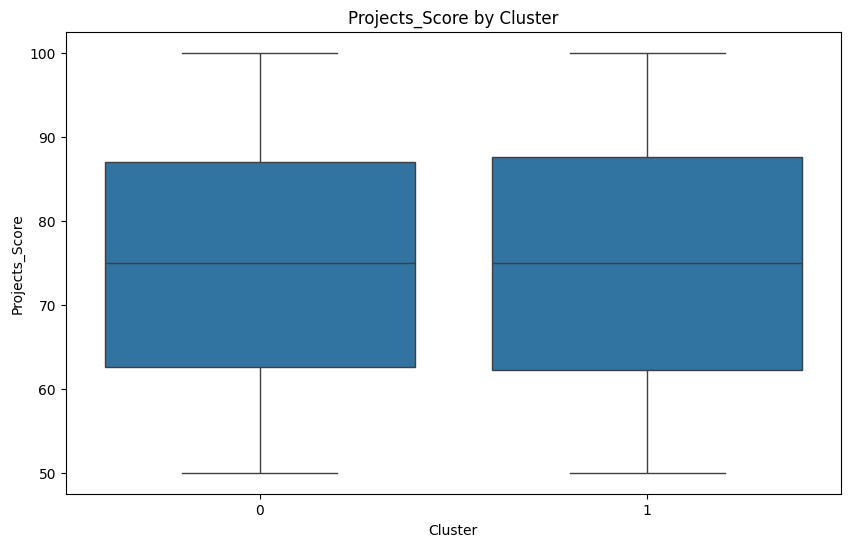

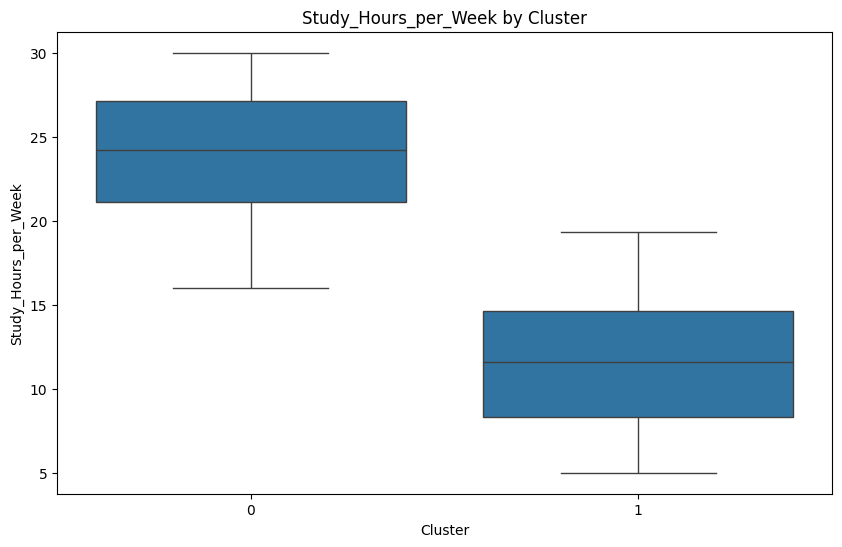

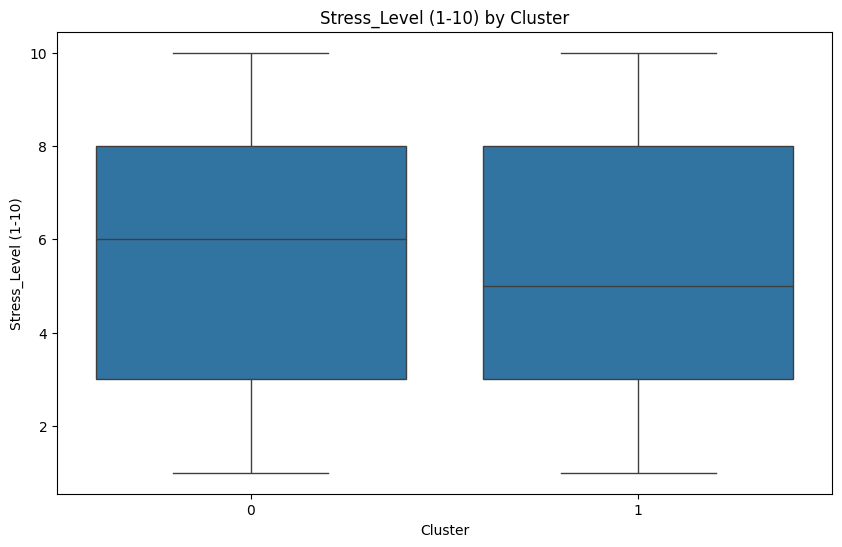

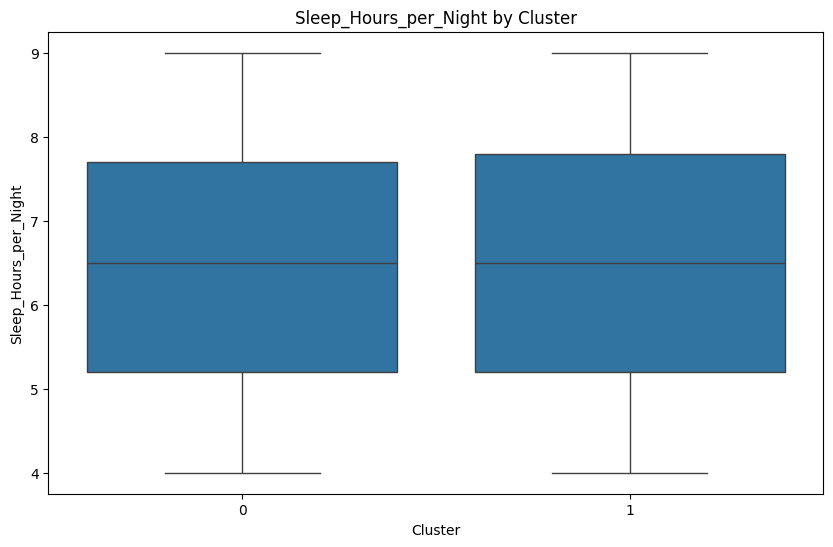

In [76]:
# Visualize cluster characteristics
for feature in cluster_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'{feature} by Cluster')
    plt.show()

### 3. Problem Solving